![Spotify](spotify.png "Spotify")

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [136]:
df = pd.read_csv('spotify.csv')
df.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo


In [137]:
df.tail()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019.0,2020‑08‑20,138.0,58.0,53.0,-6.0,10.0,59.0,214.0,1.0,10.0,67.0,2019.0,Duo
999,The London (feat. J. Cole & Travis Scott),Young Thug,atl hip hop,2019.0,2020‑06‑22,98.0,59.0,80.0,-7.0,13.0,18.0,200.0,2.0,15.0,75.0,2019.0,Solo
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1000 non-null   object 
 1   artist         1000 non-null   object 
 2   top genre      1000 non-null   object 
 3   year released  998 non-null    float64
 4   added          1000 non-null   object 
 5   bpm            1000 non-null   float64
 6   nrgy           1000 non-null   float64
 7   dnce           1000 non-null   float64
 8   dB             1000 non-null   float64
 9   live           1000 non-null   float64
 10  val            1000 non-null   float64
 11  dur            1000 non-null   float64
 12  acous          1000 non-null   float64
 13  spch           1000 non-null   float64
 14  pop            1000 non-null   float64
 15  top year       1000 non-null   float64
 16  artist type    1000 non-null   object 
dtypes: float64(12), object(5)
memory usage: 133.3+ KB


In [139]:
df.loc[df['bpm'].sort_values(ascending=False).head(5).index,'title'] # Top 5 músicas com maiores bpms

563                                     FourFiveSeconds
109                                           Honey Bee
898    BIG BANK (feat. 2 Chainz, Big Sean, Nicki Minaj)
227                                           The Motto
969                             Pure Water (with Migos)
Name: title, dtype: object

In [140]:
df['bpm'].value_counts().head(5) # top 5 valores de bpm mais frequentes

128.0    57
120.0    55
100.0    40
125.0    35
126.0    33
Name: bpm, dtype: int64

In [141]:
df['title'].nunique() # Número de valores únicos para o título

945

In [142]:
df['title'].value_counts().head(3) # Top 3 nomes repetidos de músicas

Paradise    3
Sorry       3
Don't       3
Name: title, dtype: int64

In [143]:
df.dropna(inplace=True, how='all') # Remove as linhas com todos os elementos nulos
df['feat'] = np.full(len(df.index),np.nan) # Cria uma nova coluna de valores nulos
for current_index in df.index:
    title = df.loc[current_index,'title']
    feat_loc = title.find('feat.')
    if feat_loc != -1:
        feat_name = title[feat_loc+6:-1]
        df.loc[current_index,'feat'] = feat_name
df.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type,feat
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo,Katy Perry
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo,Ke$ha
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo,NaN
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo,Hayley Williams of Paramore
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo,Bruno Mars


In [144]:
df['number of feat'] = np.full(len(df.index),0) # Cria uma nova coluna de valores nulos
for current_index in df.index:
    feat = df.loc[current_index, 'feat']
    if type(feat) == str:
        number_of_feat = str(feat).count('&') + str(feat).count(',') + 1
        df.loc[current_index,'number of feat'] = number_of_feat
        

df.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type,feat,number of feat
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo,Katy Perry,1
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo,Ke$ha,1
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo,NaN,0
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo,Hayley Williams of Paramore,1
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo,Bruno Mars,1


In [145]:
for date in df['added']:
    pd.to_datetime(date)

ParserError: Unknown string format: 2022‑02‑17

<AxesSubplot:xlabel='artist type', ylabel='count'>

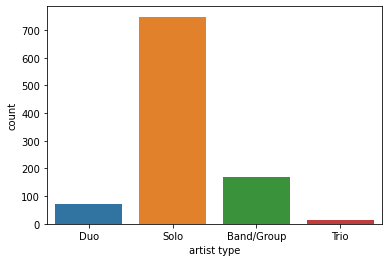

In [146]:
sns.countplot(x='artist type', data=df)

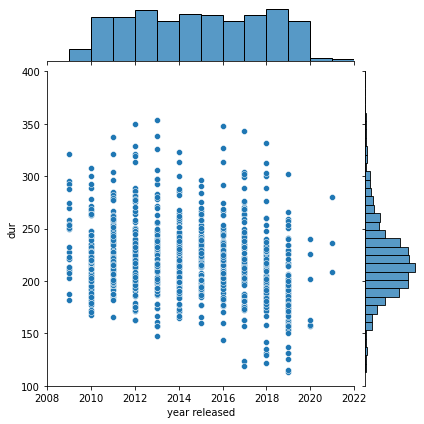

In [147]:
sns.jointplot(x='year released',y='dur',data=df,xlim=(2008,2022),ylim=(100,400))

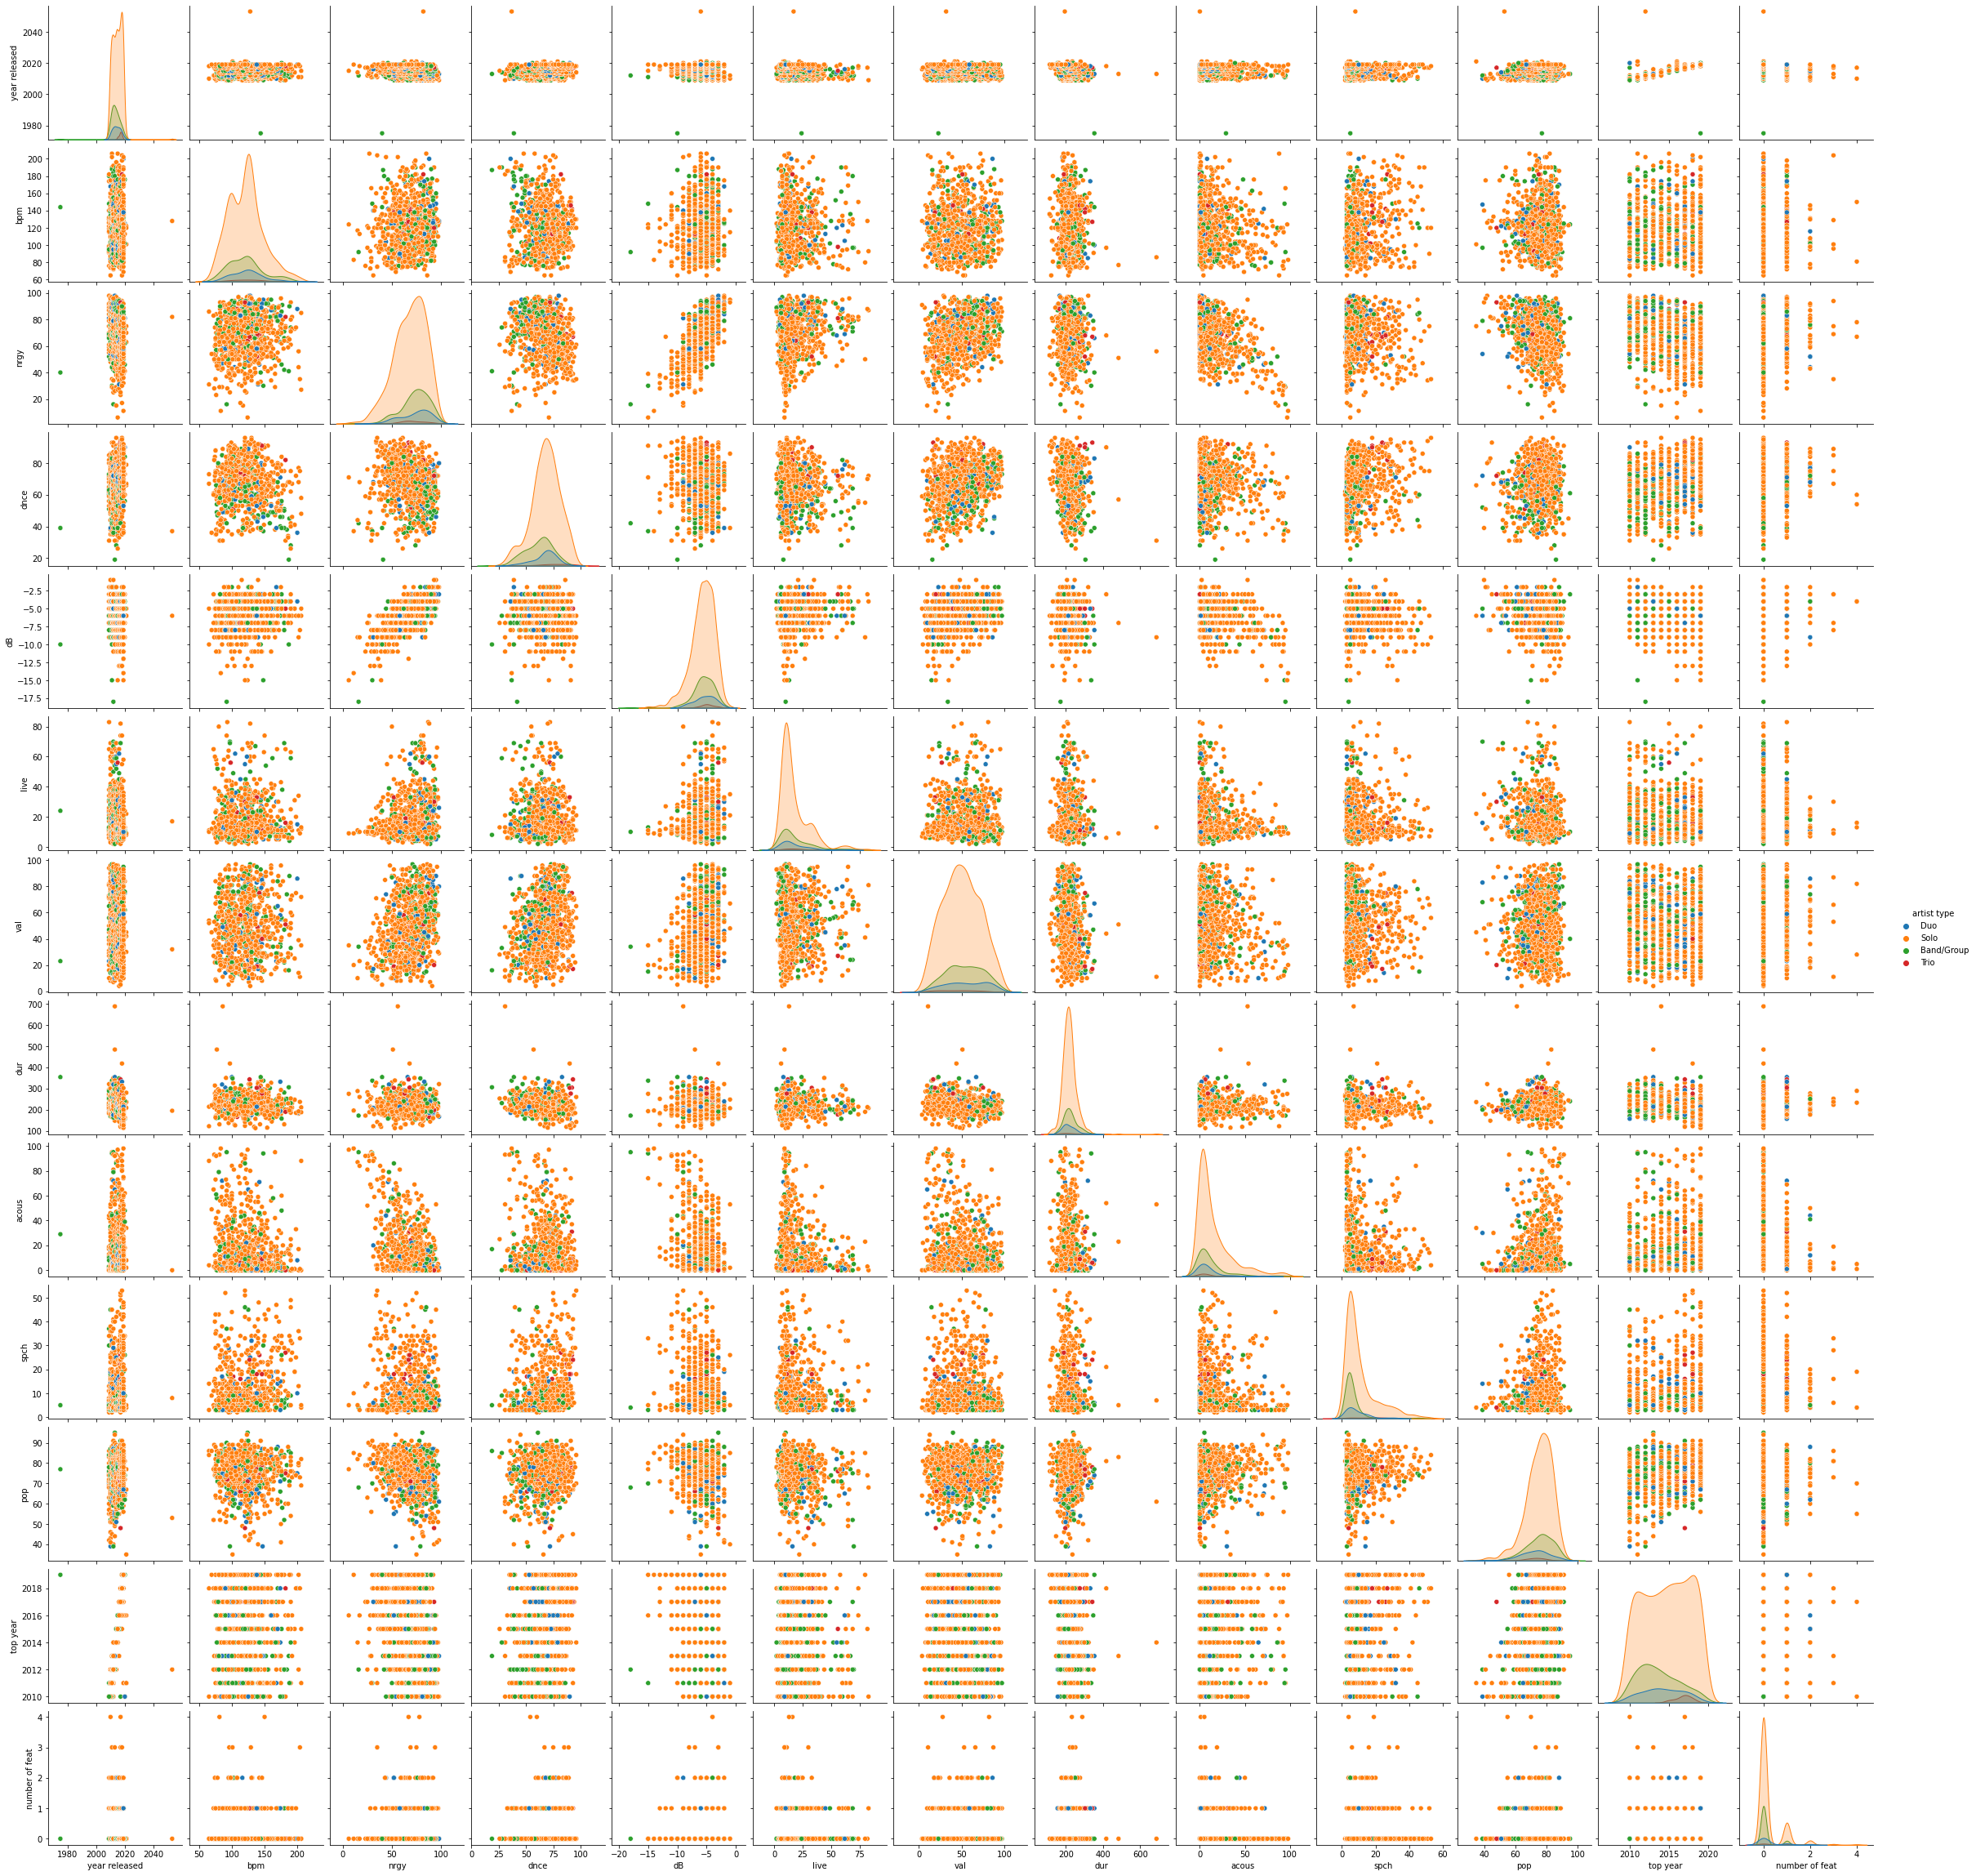

In [ ]:
sns.pairplot(df,hue='artist type')

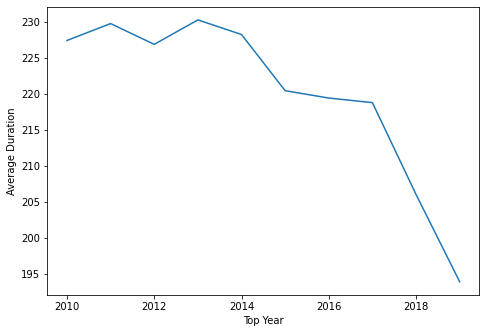

In [176]:

df2 = df[df['artist type'] == 'Solo'].groupby('top year',as_index=False).mean()
fig = plt.figure(0)
axes = fig.add_axes([0,0,1,1])
axes.set_xlabel("Top Year")
axes.set_ylabel("Average Duration")
axes.plot(df2['top year'],df2['dur'])
plt.show()


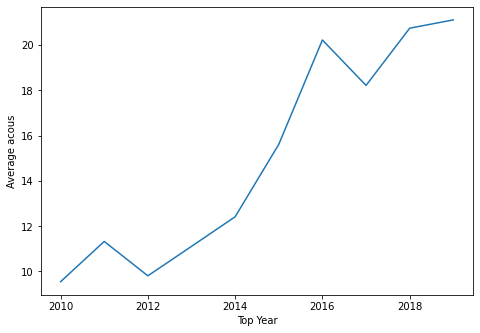

In [177]:
df2 = df[df['artist type'] == 'Solo'].groupby('top year',as_index=False).mean()
fig = plt.figure(1)
axes = fig.add_axes([0,0,1,1])
axes.set_xlabel("Top Year")
axes.set_ylabel("Average acous")
axes.plot(df2['top year'],df2['acous'])
plt.show()

<AxesSubplot:ylabel='top year'>

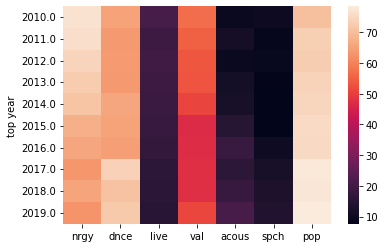

In [193]:
ty = df.groupby('top year').mean()
sns.heatmap(ty[['nrgy','dnce','live','val','acous','spch','pop']])